# Test of the function to generate a customized mesh :

Imports :

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from openaerostruct.geometry.utils import gen_custom_mesh
from openaerostruct.geometry.utils import generate_mesh
%matplotlib notebook

A function to plot a mesh :

In [8]:
"""A function to plot a mesh
n_mesh = 1 : only one mesh needs to be ploted
n_mesh > 1 : mesh is a list of meshes, we plot all the meshes on the same figure
"""
def plotmesh(mesh, n_mesh=1):
    %matplotlib qt
    
    maxi_ax = 0
    for i in range(n_mesh):
        maxi_ax = max([np.max(mesh[i]), maxi_ax])
    print(maxi_ax)
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    if(n_mesh == 1):
        ax.plot_wireframe(mesh[:,:,0], mesh[:,:,1], mesh[:,:,2],rstride=1,cstride=1, label = 'initial') 
    else:
        for i in range(n_mesh):
            ax.plot_wireframe(mesh[i][:,:,0], mesh[i][:,:,1], mesh[i][:,:,2],rstride=1,cstride=1, label = 'initial') 
        
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    #ax.set_xlim(-(1+ np.max(mesh)),(1+ np.max(mesh))) # à commenter pour mieux voir le twist ou le dihèdre
    #ax.set_ylim(-(1+ np.max(mesh)),(1+ np.max(mesh))) # à commenter pour mieux voir le twist ou le dihèdre
    #ax.set_zlim(-(1+ np.max(mesh)),(1+ np.max(mesh))) # à commenter pour mieux voir le twist ou le dihèdre
    
    ax.set_xlim(-(1+ maxi_ax),(1+ maxi_ax)) # à commenter pour mieux voir le twist ou le dihèdre
    ax.set_ylim(-(1+ maxi_ax),(1+ maxi_ax)) # à commenter pour mieux voir le twist ou le dihèdre
    ax.set_zlim(-(1+ maxi_ax),(1+ maxi_ax)) # à commenter pour mieux voir le twist ou le dihèdre
    ax.legend(loc=0)
    plt.show()

There are two methods to customize meshes :
    
    1) We can use directly the "gen_custom_mesh" function of the file "utils"
    
    2) We can use the classic "generate_mesh" function by specifying that the "wing_type" is "customized" in the 
    mesh dictionnary

Method 1 :

[[[ 1.73205081e+01 -3.00000000e+01  7.99333848e+00]
  [ 1.60020629e+01 -2.77163860e+01  4.25511299e+00]
  [ 1.22474487e+01 -2.12132034e+01  2.15542100e+00]
  [ 6.62827148e+00 -1.14805030e+01  5.30912331e-01]
  [-1.64071560e-16 -1.83697020e-15  0.00000000e+00]
  [ 6.62827148e+00  1.14805030e+01  5.30912331e-01]
  [ 1.22474487e+01  2.12132034e+01  2.15542100e+00]
  [ 1.60020629e+01  2.77163860e+01  4.25511299e+00]
  [ 1.73205081e+01  3.00000000e+01  7.99333848e+00]]

 [[ 1.76724578e+01 -3.00000000e+01  7.80106748e+00]
  [ 1.67059623e+01 -2.77163860e+01  4.03737139e+00]
  [ 1.33032978e+01 -2.12132034e+01  2.04948273e+00]
  [ 8.15338686e+00 -1.14805030e+01  5.15660669e-01]
  [ 2.34633135e+00 -1.83697020e-15  0.00000000e+00]
  [ 8.15338686e+00  1.14805030e+01  5.15660669e-01]
  [ 1.33032978e+01  2.12132034e+01  2.04948273e+00]
  [ 1.67059623e+01  2.77163860e+01  4.03737139e+00]
  [ 1.76724578e+01  3.00000000e+01  7.80106748e+00]]

 [[ 1.81991877e+01 -3.00000000e+01  7.51331360e+00]
  [ 1.77

<IPython.core.display.Javascript object>


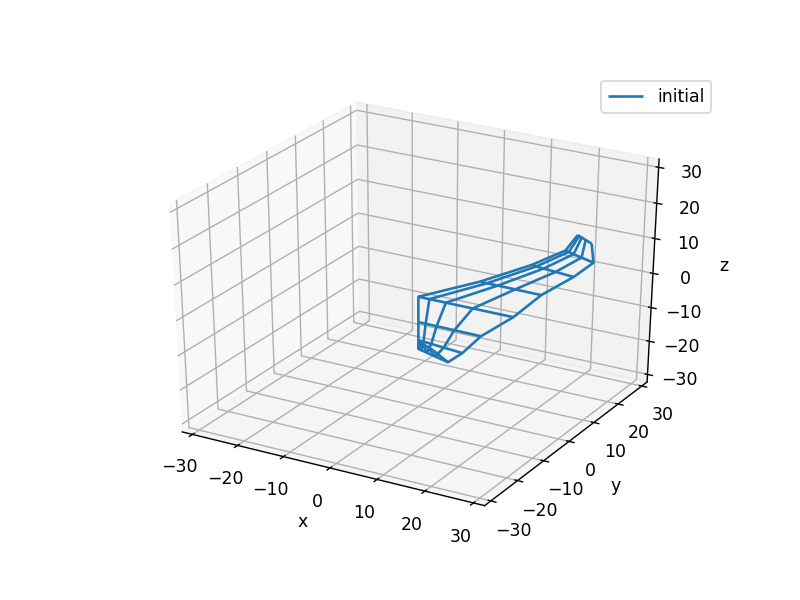

In [9]:
# rmq : soit on donne le taper ratio en entrée et on la chord_distrib est de dim(num_y-2) soit on ne donne pas le taper ratio en entrée et on utilise une chord_distrib de dim(num_y).  
mesh = gen_custom_mesh(num_x = 5, num_y = 9, span = 60, chord_distrib = np.array([3, 6, 9, 13, 20, 13, 9, 6, 3]), sweep_angle = np.pi/6, dihedral_angle_distrib = np.array([60, 10, 5, 2, 2, 5, 10, 60]), taper_ratio = 0.3, wing_twist_distrib = np.array([0.5, 0.3, 0.1, 0.01, 0, 0.01, 0.1, 0.3, 0.5]), span_cos_spacing= 1, chord_cos_spacing= -1)

print(mesh)
plotmesh(mesh)

Method 2 :

[[[ 1.73205081e+01 -3.00000000e+01  7.31728356e+00]
  [ 1.50000000e+01 -2.59807621e+01  4.28440649e+00]
  [ 8.66025404e+00 -1.50000000e+01  1.04408905e+00]
  [-1.64071560e-16 -1.83697020e-15  0.00000000e+00]
  [ 8.66025404e+00  1.50000000e+01  1.04408905e+00]
  [ 1.50000000e+01  2.59807621e+01  4.28440649e+00]
  [ 1.73205081e+01  3.00000000e+01  7.31728356e+00]]

 [[ 1.80244075e+01 -3.00000000e+01  7.01967966e+00]
  [ 1.60558491e+01 -2.59807621e+01  4.07037528e+00]
  [ 1.01853694e+01 -1.50000000e+01  9.83051882e-01]
  [ 2.34633135e+00 -1.83697020e-15  0.00000000e+00]
  [ 1.01853694e+01  1.50000000e+01  9.83051882e-01]
  [ 1.60558491e+01  2.59807621e+01  4.07037528e+00]
  [ 1.80244075e+01  3.00000000e+01  7.01967966e+00]]

 [[ 1.90778674e+01 -3.00000000e+01  6.57428396e+00]
  [ 1.76360390e+01 -2.59807621e+01  3.75005494e+00]
  [ 1.24678659e+01 -1.50000000e+01  8.91703298e-01]
  [ 5.85786438e+00 -1.83697020e-15  0.00000000e+00]
  [ 1.24678659e+01  1.50000000e+01  8.91703298e-01]
  [ 1.76

<IPython.core.display.Javascript object>


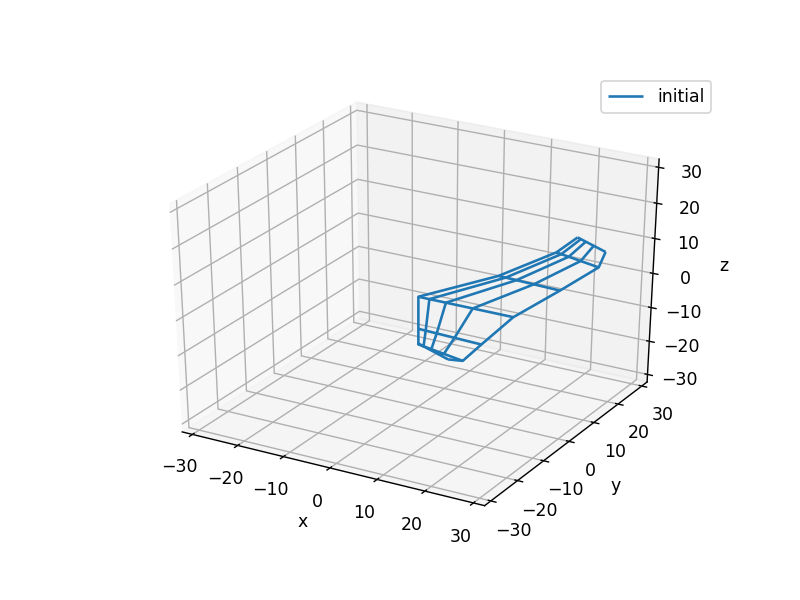

In [10]:
#création d'un dictionnaires qui contient les options du maillage :
mesh_dict = {'num_y' : 7,
             'num_x' : 5,
             'span' :60,
             'wing_type' : 'customized', # the wing type is customized !!!
             'symmetry' : False,
             'chord_distrib' : np.array([6, 9, 13, 20, 13, 9, 6]),
             'sweep' : np.pi/6,
             'dihedral_angle_distrib' : np.array([30, 10, 2, 2, 10, 30]),
             'taper' : 0.3,
             'wing_twist_distrib' : 4*np.array([0.1, 0.05, 0.01, 0, 0.01, 0.05, 0.1]),
             'chord_cos_spacing' : -1,
             'span_cos_spacing' : 1}

# génération d'un maillage basé sur le dictionnaire grâce à la fonction generate_mesh() :
mesh2 = generate_mesh(mesh_dict)

print(mesh2)
plotmesh(mesh2)